# Lecture 7: Supervised Learning - Decision Tree, Cross-validation and Grid Search
Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Decision Tree Classification
- Cross-Validation
- Grid Search

#### References:
[1] Decision and Classification Trees, Clearly Explained!!! https://www.youtube.com/watch?v=_L39rN6gz7Y&ab_channel=StatQuestwithJoshStarmer
<br>[2] StatQuest: Decision Trees: https://www.youtube.com/watch?v=7VeUPuFGJHk&t=302s&ab_channel=StatQuestwithJoshStarmer
<br>[3] StatQuest: Decision Trees, Part 2 - Feature Selection and Missing Data: https://www.youtube.com/watch?v=wpNl-JwwplA&ab_channel=StatQuestwithJoshStarmer
<br>[4] scikit-learn decision tree classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<br>[5] Decision Trees in Python from Start to Finish: https://www.youtube.com/watch?v=q90UDEgYqeI&ab_channel=StatQuestwithJoshStarmer
<br> [6] Plotting a tree diagram https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
<br>[7] Plotting confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
<br>[8] Regression Trees, Clearly Explained!!! https://www.youtube.com/watch?v=g9c66TUylZ4&ab_channel=StatQuestwithJoshStarmer
<br>[9] Machine Learning Fundamentals: Cross Validation: https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer
<br>[10] Machine Learning Tutorial Python - 16: Hyper parameter Tuning (GridSearchCV): https://www.youtube.com/watch?v=HdlDYng8g9s&ab_channel=codebasics
<br>[11] Data Source: https://archive.ics.uci.edu/ml/datasets/heart+disease
<br>[12] https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8

**age:** age in years
<br>**sex:** sex (1 = male; 0 = female)
<br>**cp:** chest pain type
- 1 = typical angina
- 2 = atypical angina
- 3 = non-anginal pain
- 4 = asymptomatic

<br>**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
<br>**chol:** serum cholestoral in mg/dl
<br>**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
<br>**restecg:** resting electrocardiographic results
- 0 = normal
- 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

<br>**thalach:** maximum heart rate achieved
<br>**exang:** exercise induced angina (1 = yes; 0 = no)
<br>**oldpeak:** ST depression induced by exercise relative to rest
<br>**slope:** the slope of the peak exercise ST segment
- 1 = upsloping
- 2 = flat
- 3 = downsloping

<br>**ca:** number of major vessels (0-3) colored by flourosopy
<br>**thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect
<br>**hd:** heart disease 

In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

#### Loading heart disease data

In [210]:
df = pd.read_csv("processed.cleveland.data", header=None, na_values="?")

df = df.dropna()
# print(df.columns)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
              'restecg', 'thalach', 'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'hd']

display(df.head(10))
print(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  hd        297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None


In [211]:
# df.isna().sum()

#### Checking categorical variables

In [212]:
df["thal"].value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

In [213]:
df["ca"].value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [214]:
df["cp"].value_counts()

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

In [215]:
df["slope"].value_counts()

1.0    139
2.0    137
3.0     21
Name: slope, dtype: int64

In [216]:
df["restecg"].value_counts()

0.0    147
2.0    146
1.0      4
Name: restecg, dtype: int64

In [217]:
cat_vars = ["restecg", "slope", "cp", "ca", "thal"]

#### Target variable: 'hd'

In [218]:
df["hd"].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64

In [219]:
df[df["hd"]>1] = 1

In [220]:
df["hd"].value_counts()

0    160
1    137
Name: hd, dtype: int64

#### Create feature set and target

In [221]:
X = df.drop("hd", axis=1)
y = df[["hd"]]

print(X.shape, y.shape)
print(X.columns)

(297, 13) (297, 1)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


#### One-hot encoding

In [222]:
X = pd.get_dummies(X, columns=cat_vars, drop_first=True)

print(X.shape)

(297, 21)


In [223]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'restecg_1.0', 'restecg_2.0', 'slope_2.0', 'slope_3.0', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')

In [224]:
display(X.head())

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,restecg_1.0,restecg_2.0,...,slope_3.0,cp_2.0,cp_3.0,cp_4.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,1,...,0,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,1,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,0,1,0,0,0,0,0,1,0,0


#### Split the dataset intro train and test set

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 21) (60, 21) (237, 1) (60, 1)


#### Decision Tree classifier, no grid search

In [226]:
model_DT = DecisionTreeClassifier()
# model_DT = LogisticRegression()
model_DT = model_DT.fit(X_train, y_train)

#### Tree Diagram

In [227]:
# plt.figure(figsize = (15, 15))
# plot_tree(model_DT, 
#           filled=True,
#           rounded=True,
#           class_names = ["No HD", "Yes HD"],
#           feature_names = X.columns,
#           max_depth=2, 
#           fontsize=15)

# plt.show()

#### Model Performance Evaluation

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


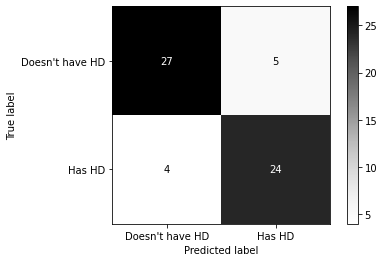

In [228]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have HD", "Has HD"],
                      cmap='Greys')
plt.show()

In [229]:
y_pred_DT = model_DT.predict(X_test)

Accuracy:  0.85
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



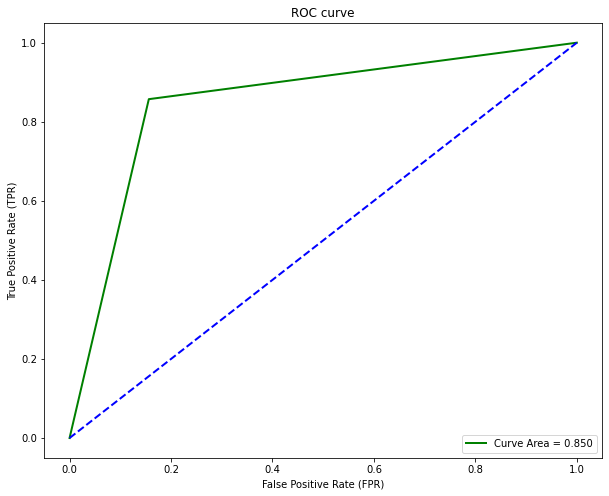

In [230]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Grid Search and cross-validation

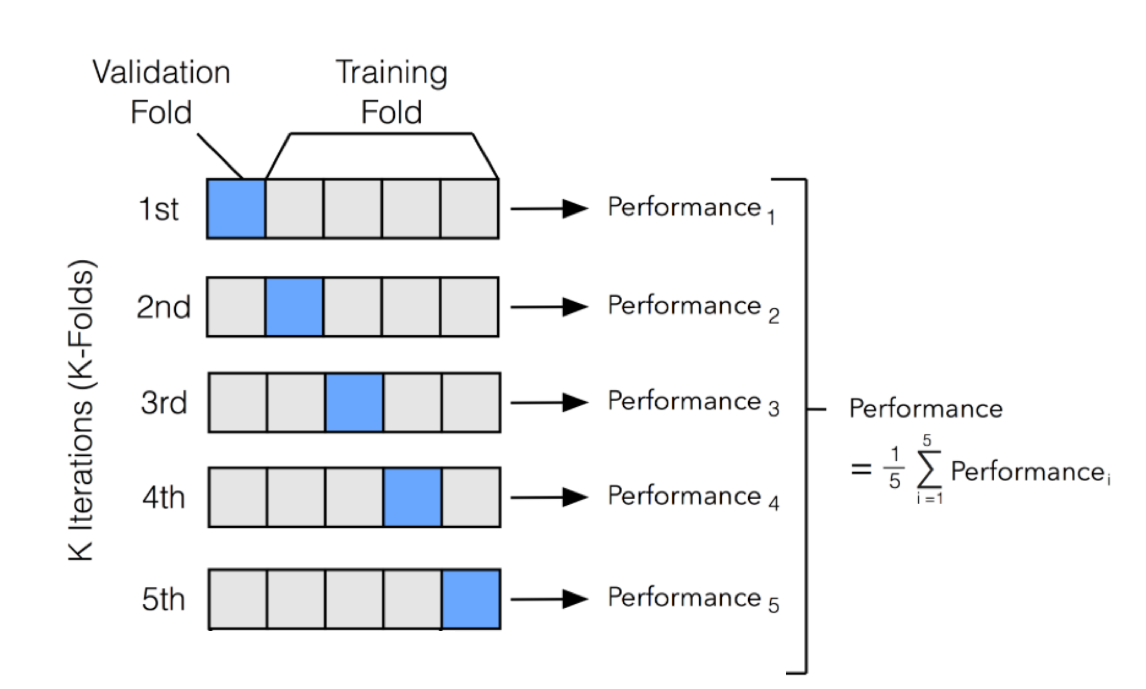
image source: https://www.analyticsvidhya.com/blog/2021/05/importance-of-cross-validation-are-evaluation-metrics-enough/

In [231]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7, None],
              'max_features': ["auto"]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="recall",
                           cv=5,
                           n_jobs=-1)

# grid_search = GridSearchCV(estimator=model,
#                            param_grid=parameters,
#                            scoring="accuracy",
#                            cv=5,
#                            n_jobs=-1)

# grid_search = GridSearchCV(estimator=model,
#                            param_grid=parameters,
#                            scoring="precision",
#                            cv=5,
#                            n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

#### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [232]:
y_pred = grid_result.predict(X_test)

#### Best hyperparameters in the grid search

In [233]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto'}

In [234]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,entropy,None,0.909091,0.863636,0.863636,0.636364,0.666667,0.787879,0.112978,1
5,gini,None,0.909091,0.863636,0.772727,0.681818,0.619048,0.769264,0.108334,2
3,gini,6,0.909091,0.863636,0.818182,0.681818,0.523810,0.759307,0.140178,3
2,gini,5,0.863636,0.863636,0.818182,0.590909,0.619048,0.751082,0.120771,4
4,gini,7,0.909091,0.863636,0.772727,0.590909,0.619048,0.751082,0.127430,4
9,entropy,6,0.909091,0.818182,0.818182,0.636364,0.571429,0.750649,0.126021,6
10,entropy,7,0.909091,0.909091,0.818182,0.590909,0.523810,0.750216,0.162321,7
0,gini,3,0.863636,0.909091,0.772727,0.636364,0.428571,0.722078,0.173822,8
6,entropy,3,0.863636,0.818182,0.772727,0.636364,0.476190,0.713420,0.140906,9
7,entropy,4,0.863636,0.818182,0.818182,0.545455,0.476190,0.704329,0.160370,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


#### Model performance evaluation with the best found model in grid search and cross-validation

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


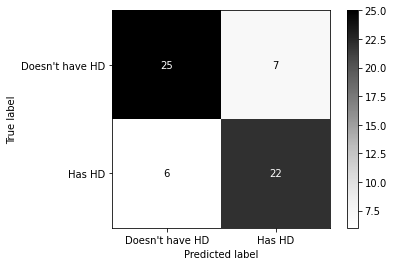

In [235]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have HD", "Has HD"],
                      cmap='Greys')
plt.show()

In [236]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[25  7]
 [ 6 22]]
Accuracy:  0.7833333333333333
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



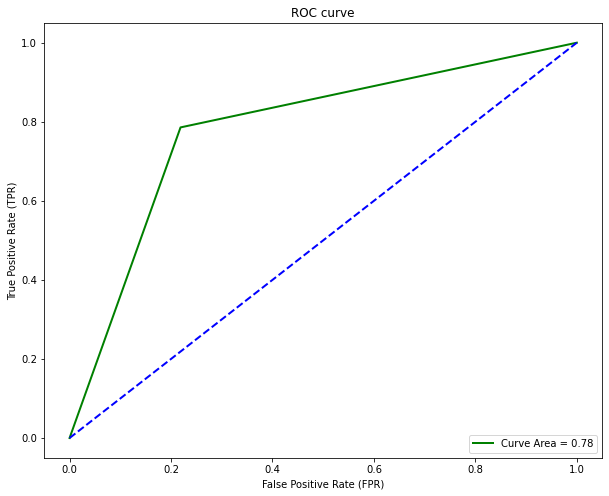

In [237]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()